In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import datetime as dt
import statistics as stat
import csv
import talib

## 1.  資料匯入

In [2]:
data = pd.read_csv("data_adjclose.csv", index_col=0 )
data.index = pd.to_datetime(data.index)
tickers = [i for i in data]
data.head()

,EWA,EWZ,EWC,FXI,EWQ,EWG,EWH,EWI,EWJ,EWY,EWN,EWS,EZA,EWP,EWD,EWL,EWT,EWU,IVV
Date,,,,,,,,,,,,,,,,,,,
2005-01-03,8.096329,13.960760,12.801544,13.128471,16.048155,13.164283,7.563420,31.394938,34.714676,23.648851,12.573286,7.905364,22.997406,18.841242,12.727464,12.706832,15.704612,19.919771,87.991096
2005-01-04,7.953772,13.361337,12.427669,12.766636,15.686164,12.901708,7.380638,30.679733,34.135559,23.001278,12.389185,7.771184,22.141087,18.481796,12.408527,12.307665,15.347388,19.554167,86.931953
2005-01-05,7.983264,13.245315,12.263162,12.476211,15.706274,12.908807,7.216763,30.840042,34.103386,23.157021,12.307363,7.916544,21.539658,18.379864,12.402509,12.307665,15.281234,19.565247,86.406013
2005-01-06,7.998014,13.129302,12.195864,12.490494,15.666056,12.915905,7.286095,30.815371,34.103386,22.771757,12.341455,8.061905,20.906729,18.465704,12.426581,12.322451,15.268003,19.554167,86.756622
2005-01-07,7.988182,13.309770,12.165953,12.378614,15.619126,12.830743,7.210459,30.494770,33.910339,22.706182,12.205086,7.950090,21.018419,18.068705,12.276138,12.085903,15.148928,19.576326,86.595924


In [3]:
returns = (data - data.shift(1)) / data.shift(1)

## 2. 兩種觀點下的long-short portfolio

### 技術指標1：KD值

In [8]:
from talib import abstract
print(abstract.STOCH)

STOCH([input_arrays], [fastk_period=5], [slowk_period=3], [slowk_matype=0], [slowd_period=3], [slowd_matype=0])

Stochastic (Momentum Indicators)

Inputs:
    prices: ['high', 'low', 'close']
Parameters:
    fastk_period: 5
    slowk_period: 3
    slowk_matype: 0
    slowd_period: 3
    slowd_matype: 0
Outputs:
    slowk
    slowd


In [9]:
#匯入最高價、最低價、收盤價(未調整)資料
high = pd.read_csv("data_high.csv", index_col=0 )
high.index = pd.to_datetime(high.index)

low = pd.read_csv("data_low.csv", index_col=0 )
low.index = pd.to_datetime(low.index)

close = pd.read_csv("data_close.csv", index_col=0 )
close.index = pd.to_datetime(close.index)

<b> (1) 計算KD值

In [10]:
def etf2pd(etf):
    etf_pd = pd.DataFrame(index=data.index)
    etf_pd["high"] = high[etf]
    etf_pd["low"] = low[etf]
    etf_pd["close"] = close[etf]
    return etf_pd

In [11]:
#K-D>0:買進；K-D<0:賣出
kd = pd.DataFrame()
for i in tickers:
    tmp_kd = abstract.STOCH(etf2pd(i), fastk_period=9, slowk_period=3,slowd_period=3).fillna(value=0).asfreq("BM")
    comp_kd = tmp_kd["slowk"] - tmp_kd["slowd"]   #series
    kd[i] = comp_kd

kd.head()

,EWA,EWZ,EWC,FXI,EWQ,EWG,EWH,EWI,EWJ,EWY,EWN,EWS,EZA,EWP,EWD,EWL,EWT,EWU,IVV
Date,,,,,,,,,,,,,,,,,,,
2005-01-31,-3.338964,-0.162854,4.506110,0.503149,0.893168,-1.930519,0.348465,9.273940,1.416509,-2.959619,4.241357,-0.042129,6.323115,13.200215,-0.793644,-3.950624,12.480977,2.546269,7.477616
2005-02-28,4.878163,-2.096977,0.076048,6.505569,5.543672,5.047259,6.766467,25.811234,13.823652,0.721753,-0.494303,-7.904937,-4.673174,6.864821,-1.799052,4.755436,19.232478,0.087080,19.084277
2005-03-31,2.398714,10.437846,11.434428,1.974395,4.517123,7.941814,10.893262,21.839255,-0.484985,4.586761,4.999536,2.778969,11.590073,1.940132,6.046458,4.122102,7.657972,3.289232,15.067370
2005-04-29,1.045494,-16.857158,-16.381040,2.165434,-2.706236,-0.461393,1.984389,-7.495883,6.743607,-12.590413,4.230564,7.642495,-12.758694,-1.795630,-16.295002,-7.810257,7.139965,-5.198736,3.016979
2005-05-31,-2.684381,-5.305669,0.174024,22.470760,-3.939048,-6.468877,20.025550,14.809972,8.490022,-4.846244,-17.899387,-8.532076,-4.076305,-15.869585,-13.296115,-7.056060,15.569346,-13.970762,-4.133408


<b> (2) 定義函數：抓每個月KD前四和後四檔的ETF

In [12]:
def get_8_etf_kd(time):   #time: "y-m" ex."2005-1"   #output: 兩個list(long, short)
    temp_kd_set = kd[time]   #type: pd.dataframe
    monthly_kd_set = []   #每個月的etf排名及其kd值
    for j in range(temp_kd_set.shape[1]):   #df行數
        etf_kd = [tickers[j], temp_kd_set.iloc[0, j]]
        monthly_kd_set.append(etf_kd)
    monthly_kd_set.sort(key=lambda x: x[1], reverse=True)
    #print(monthly_kd_set)
    #取出每月前四檔和後四檔etf名稱
    long_4_etf = [k[0] for k in monthly_kd_set[:4]]
    short_4_etf = [l[0] for l in monthly_kd_set[-4:]]
    return long_4_etf, short_4_etf

<b> (3) 使用函數跑每月的權重與最終整體報酬率（period: 2005/1~2012/12)

In [13]:
weight_kd = pd.DataFrame(columns=tickers,index=kd.index).fillna(value=0)

for y in range(2005, 2013):
    for m in range(1, 13):
        time = str(y)+'-'+str(m)
        #print(time)
        tmp_etf = get_8_etf_kd(time)
        for a in tmp_etf[0]:
            weight_kd.loc[time, a] = 0.25
        for b in tmp_etf[1]:
            weight_kd.loc[time, b] = -0.25

weight_kd.head()

,EWA,EWZ,EWC,FXI,EWQ,EWG,EWH,EWI,EWJ,EWY,EWN,EWS,EZA,EWP,EWD,EWL,EWT,EWU,IVV
Date,,,,,,,,,,,,,,,,,,,
2005-01-31,-0.25,0.00,0.00,0.00,0.0,-0.25,0.00,0.25,0.00,-0.25,0.00,0.00,0.00,0.25,0.00,-0.25,0.25,0.00,0.25
2005-02-28,0.00,-0.25,0.00,0.00,0.0,0.00,0.00,0.25,0.25,0.00,0.00,-0.25,-0.25,0.00,-0.25,0.00,0.25,0.00,0.25
2005-03-31,-0.25,0.00,0.25,-0.25,0.0,0.00,0.00,0.25,-0.25,0.00,0.00,0.00,0.25,-0.25,0.00,0.00,0.00,0.00,0.25
2005-04-29,0.00,-0.25,-0.25,0.00,0.0,0.00,0.00,0.00,0.25,0.00,0.25,0.25,-0.25,0.00,-0.25,0.00,0.25,0.00,0.00
2005-05-31,0.00,0.00,0.00,0.25,0.0,0.00,0.25,0.25,0.00,0.00,-0.25,0.00,0.00,-0.25,-0.25,0.00,0.25,-0.25,0.00


In [15]:
q_kd = []    #q1~q95
tmp_weight_kd = weight_kd.shift(1) #把前個月的權重換成下個月index，使ret_次月和weight_這個月配在一起
for y in range(2005, 2013):
    for m in range(1, 13):
        time = str(y)+'-'+str(m)   #這個月
        #print(time)
        if time != '2005-1':
            tmp_ret = returns[time].mean()    #series   #若沒有取mean,則為dataframe
            monthly_q_kd = float(tmp_weight_kd[time].dot(tmp_ret).to_numpy())
            q_kd.append(monthly_q_kd)
        else:
            pass
#print(len(q_kd))
print('KD mean:', stat.mean(q_kd))

KD mean: -0.00022424838557643777


<b/> ➤以KD作為投資組合選擇指標建構long-short portfolio，則平均報酬率為-0.0224%。

### 技術指標2：指數移動平均線 EMA

<b> (1) 計算每日20日(短線)與35日(長線)的EMA差值，取每月月底MA數值作為預測。

In [16]:
ma = pd.DataFrame()
for i in tickers:
    ma[i] = talib.EMA(data[i], timeperiod=20) - talib.EMA(data[i], timeperiod=35)
monthly_ma = ma.asfreq("BM")

若為正數，即表示當日短均線超過長均線，為看漲的股票；反之則看跌。

<b> (2) 同上步驟，抓出每月long-short portfolio的資產分配權重，並試算出2005~2012年的整體報酬率。

In [17]:
def get_8_etf_ma(time):   #time: "y-m" ex."2014-1"   #output: 兩個list(long, short)
    temp_ma_set = monthly_ma[time]   #type: pd.dataframe
    monthly_ma_set = []   #每個月的etf排名及其ma值
    for j in range(temp_ma_set.shape[1]):   #df行數
        etf_ma = [tickers[j], temp_ma_set.iloc[0, j]]   #ix: label or index searching
        monthly_ma_set.append(etf_ma)
    monthly_ma_set.sort(key=lambda x: x[1], reverse=True)
    #取出每月前四檔和後四檔etf名稱
    long_4_etf = [k[0] for k in monthly_ma_set[:4]]
    short_4_etf = [l[0] for l in monthly_ma_set[-4:]]
    return long_4_etf, short_4_etf

In [18]:
weight_ma = pd.DataFrame(columns=tickers,index=pd.date_range('2005/1/1','2019/12/31', freq='BM')).fillna(value=0)

for y in range(2005, 2013):
    for m in range(1, 13):
        time = str(y)+'-'+str(m)
        #print(time)
        tmp_etf = get_8_etf_ma(time)
        for a in tmp_etf[0]:
            weight_ma.loc[time, a] = 0.25
        for b in tmp_etf[1]:
            weight_ma.loc[time, b] = -0.25
            
weight_ma.head()

,EWA,EWZ,EWC,FXI,EWQ,EWG,EWH,EWI,EWJ,EWY,EWN,EWS,EZA,EWP,EWD,EWL,EWT,EWU,IVV
2005-01-31,0.25,0.25,0.25,0.25,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,-0.25,-0.25,-0.25,-0.25
2005-02-28,0.00,0.25,0.00,0.00,0.00,0.0,-0.25,0.00,-0.25,0.25,0.0,-0.25,0.25,0.0,-0.25,0.00,0.00,0.00,0.25
2005-03-31,0.00,0.00,0.25,0.00,0.25,0.0,0.00,0.25,-0.25,0.25,0.0,0.00,-0.25,0.0,0.00,0.00,-0.25,0.00,-0.25
2005-04-29,0.00,0.00,0.00,0.00,0.00,0.0,0.25,0.00,-0.25,-0.25,0.0,0.25,-0.25,0.0,0.25,0.25,0.00,0.00,-0.25
2005-05-31,0.00,0.25,0.00,0.00,0.00,0.0,0.00,-0.25,-0.25,0.25,0.0,0.00,-0.25,0.0,0.00,0.00,0.25,-0.25,0.25


In [20]:
q_ma = []    #q1~q95
tmp_weight_ma = weight_ma.shift(1)
for y in range(2005, 2013):
    for m in range(1, 13):
        time = str(y)+'-'+str(m)   #這個月
        #print(time)
        if time != '2005-1':
            tmp_ret = returns[time].mean()    #series   #若沒有取mean,則為dataframe
            monthly_q_ma = float(tmp_weight_ma[time].dot(tmp_ret).to_numpy())
            q_ma.append(monthly_q_ma)
        else:
            pass

print('EMA mean:', stat.mean(q_ma))

EMA mean: -0.00016130597212558745


<b/> ➤以EMA作為投資組合選擇的指標，則平均報酬率為-0.0161%。

### 合併兩種view的估計資料

In [21]:
Q = np.array([
    [stat.mean(q_kd)],
    [stat.mean(q_ma)]
])
Q

array([[-0.00022425],
       [-0.00016131]])

In [22]:
omega = np.cov(np.stack((q_kd, q_ma), axis = 0)  )
print(omega) 

[[ 1.97176513e-06 -8.69341884e-07]
 [-8.69341884e-07  2.79148775e-06]]


## 3. 代入Blacklitterman Model (period2： 2013/1 ~ 2019/12)

<b> (1) 以KD與EMA作為技術指標，預測第二期的long-short portfolio權重

In [23]:
w_eq = np.array([
    [0.01797, 0.00554, 0.02888, 0.04935, 0.02994, 0.02390, 0.01081, 0.00598, 0.07510, 0.01466,
     0.01201, 0.00316, 0.00454, 0.00672, 0.00773, 0.03099, 0.01540, 0.04248, 0.61484]])
#每個月一個共變數矩陣sigma
tau = 0.05
delta = 3.37  #風險趨避係數
omega_inv = np.linalg.inv(omega)

In [25]:
#第二段區間的時間(2013/1~2019/12)
period_2 = []
for y in range(2013, 2020):
    for m in range(1, 13):
        time = str(y)+'-'+str(m)
        period_2.append(time)

In [27]:
for time in period_2:
    tmp_etf = get_8_etf_kd(time)
    for a in tmp_etf[0]:
        weight_kd.loc[time, a] = 0.25
    for b in tmp_etf[1]:
        weight_kd.loc[time, b] = -0.25
        
weight_kd.tail()

,EWA,EWZ,EWC,FXI,EWQ,EWG,EWH,EWI,EWJ,EWY,EWN,EWS,EZA,EWP,EWD,EWL,EWT,EWU,IVV
Date,,,,,,,,,,,,,,,,,,,
2019-08-30,0.00,0.25,0.00,0.00,0.0,-0.25,-0.25,-0.25,0.00,0.0,0.00,0.25,0.25,-0.25,0.00,0.00,0.25,0.00,0.00
2019-09-30,-0.25,0.00,-0.25,0.00,0.0,0.00,0.00,0.25,-0.25,0.0,0.00,0.00,-0.25,0.25,0.00,0.25,0.00,0.25,0.00
2019-10-31,-0.25,0.00,0.00,-0.25,0.0,0.00,0.00,0.25,0.25,0.0,0.25,0.00,-0.25,-0.25,0.00,0.25,0.00,0.00,0.00
2019-11-29,0.25,0.00,0.25,-0.25,0.0,0.00,-0.25,0.00,0.00,0.0,0.25,0.00,-0.25,0.00,0.25,0.00,-0.25,0.00,0.00
2019-12-31,0.00,0.00,0.00,-0.25,0.0,0.00,0.25,-0.25,0.00,0.0,0.00,0.25,0.00,0.25,-0.25,0.00,0.25,0.00,-0.25


In [28]:
for time in period_2:
    tmp_etf = get_8_etf_ma(time)
    for a in tmp_etf[0]:
        weight_ma.loc[time, a] = 0.25
    for b in tmp_etf[1]:
        weight_ma.loc[time, b] = -0.25
        
weight_ma.tail()

,EWA,EWZ,EWC,FXI,EWQ,EWG,EWH,EWI,EWJ,EWY,EWN,EWS,EZA,EWP,EWD,EWL,EWT,EWU,IVV
2019-08-30,0.00,-0.25,0.25,0.0,0.0,0.0,0.00,0.0,0.00,-0.25,0.25,0.00,-0.25,0.00,0.0,0.25,0.25,0.0,-0.25
2019-09-30,0.00,-0.25,0.00,0.0,0.0,0.0,-0.25,0.0,0.25,0.25,0.00,-0.25,-0.25,0.00,0.0,0.00,0.25,0.0,0.25
2019-10-31,-0.25,0.00,-0.25,0.0,0.0,0.0,-0.25,0.0,0.25,0.25,0.00,-0.25,0.00,0.00,0.0,0.00,0.25,0.0,0.25
2019-11-29,-0.25,-0.25,0.00,0.0,0.0,0.0,-0.25,0.0,0.25,0.25,0.00,0.00,0.00,-0.25,0.0,0.00,0.25,0.0,0.25
2019-12-31,-0.25,0.25,-0.25,0.0,0.0,0.0,-0.25,0.0,0.00,0.25,0.00,-0.25,0.00,0.00,0.0,0.00,0.25,0.0,0.25


<b> (2) 代入Blacklitterman Model進行觀點調整，試算出每月最佳權重w*

In [29]:
# 每個月的P矩陣(技術指標權重)
def get_p_matrix(time):
    view1 = weight_kd[time].values.tolist()[0]
    view2 = weight_ma[time].values.tolist()[0]
    p = np.stack([view1, view2])   #matrix:2x19，type:ndarray
    return p  

In [30]:
def get_optimal_weight(time):
    P = get_p_matrix(time)
    sigma = returns[time].cov()
    A = omega/tau + (P.dot(sigma).dot(np.transpose(P))/(1+tau))
    A_inv = np.linalg.inv(A)   #反矩陣
    lmda = (omega_inv.dot(Q)*tau/delta) - A_inv.dot(P).dot((sigma/(1+tau))).dot(np.transpose(w_eq)) \
    - (A_inv.dot(P).dot((sigma/(1+tau))).dot(np.transpose(P)).dot(omega_inv).dot(Q))*(tau/delta)
    optimal_w = (1/(1+tau))*(w_eq + np.transpose(np.transpose(P).dot(lmda)))
    return optimal_w

In [34]:
# BL模型的optimal weight
w_bl = pd.DataFrame(columns=tickers,index=pd.date_range('2013/1/1','2019/12/31', freq='BM'))
for time in period_2:
    opt_w = [get_optimal_weight(time)[0]]
    #print(len(opt_w))
    w_bl[time] = opt_w

w_bl.head()

,EWA,EWZ,EWC,FXI,EWQ,EWG,EWH,EWI,EWJ,EWY,EWN,EWS,EZA,EWP,EWD,EWL,EWT,EWU,IVV
2013-01-31,0.0171143,-0.274163,0.0275048,-0.481821,0.277896,0.0227619,0.0102952,0.255077,-0.177858,0.293401,0.0114381,0.0330665,0.283763,-0.0236569,0.0073619,0.0295143,0.0447236,0.0404571,0.555505
2013-02-28,0.0391363,0.00527619,0.0275048,0.0205273,0.0285143,0.0227619,-0.0117268,0.0232666,0.0539525,0.0139619,0.0334601,0.00300952,0.0218952,0.0019493,0.0118126,0.033965,0.0146667,0.0404571,0.567991
2013-03-29,-0.302829,-0.314667,-0.292439,-0.272943,0.0285143,0.0227619,0.0102952,0.00569524,0.0715238,0.0139619,0.0114381,0.00300952,0.00432381,0.0064,0.0073619,0.349458,0.33461,0.360401,0.905505
2013-04-30,0.0171143,0.00527619,-0.177492,0.11123,0.0285143,-0.246465,0.279522,0.274922,0.00729371,0.347419,0.0114381,-0.0612206,-0.200673,0.0064,-0.261865,-0.0347158,0.283893,0.0404571,0.521332
2013-05-31,0.302055,0.290217,0.0275048,0.689488,0.101121,0.0227619,0.367843,-0.636793,-0.213417,-0.343586,0.0114381,-0.354538,-0.0682833,0.0064,0.0073619,0.0295143,0.0146667,0.0404571,0.658169


## 4. 模型投資組合績效比較

<b> (1) 投資組合報酬率比較

個別ETF報酬率比較：BL Model v.s. Equilibrium

In [36]:
# BL Model各資產每月報酬率
returns_bl = pd.DataFrame(columns=tickers,index=pd.date_range('2013/1/1','2019/12/31', freq='BM'))
for time in period_2:
    r = np.array(returns[time].mean().values)
    w = w_bl[time].values
    tmp_ret_bl = r * w
    returns_bl[time] = tmp_ret_bl
        
returns_bl.head()

,EWA,EWZ,EWC,FXI,EWQ,EWG,EWH,EWI,EWJ,EWY,EWN,EWS,EZA,EWP,EWD,EWL,EWT,EWU,IVV
2013-01-31,3.1483e-05,-0.000200114,2.19956e-05,-0.000599456,0.000418454,4.44257e-05,2.17956e-05,0.000678679,-0.000198747,-0.000842839,3.18732e-05,9.87761e-06,-0.00102889,-4.32231e-05,2.12185e-05,9.71258e-05,-3.3099e-05,5.68543e-05,0.00133028
2013-02-28,6.12655e-05,-7.94194e-06,-3.24469e-05,-6.62311e-05,-4.8254e-05,-4.7129e-05,4.8322e-06,-0.000155216,6.99673e-05,2.64119e-05,-0.000120349,-1.19637e-06,-2.94198e-05,-4.37274e-06,6.9142e-06,5.12272e-06,7.21137e-06,-5.68227e-05,0.000420999
2013-03-29,-0.000100687,0.000172492,-0.000154333,0.000705646,-1.40455e-05,-8.17117e-06,-6.89734e-06,-1.43367e-05,0.000202734,-2.5517e-05,1.00224e-05,3.3211e-06,-1.79477e-06,-1.67994e-05,2.23204e-06,0.000374976,-0.000213829,0.00030704,0.00164584
2013-04-30,3.14652e-05,3.45039e-06,0.000123167,0.000120612,7.44985e-05,-0.000470364,0.000405609,0.00139572,2.73264e-05,-0.000232284,1.80868e-05,-9.59465e-05,-8.48574e-05,2.91256e-05,-0.000255224,-6.20683e-05,0.000643804,5.31893e-05,0.000480531
2013-05-31,-0.00190742,-0.00104167,-1.23049e-05,-0.00142603,9.14814e-05,2.80753e-05,-0.00061792,-0.000396563,0.000719016,0.000194082,1.38534e-05,0.00103619,0.000260713,-8.86679e-06,-3.7373e-06,-3.33326e-05,-1.68027e-05,-1.13399e-06,0.000723701


In [37]:
# Equilibrium 各資產每月報酬率
returns_eq = pd.DataFrame(columns=tickers,index=pd.date_range('2013/1/1','2019/12/31', freq='BM'))
for time in period_2:
    r = np.array(returns[time].mean().values)
    w = w_eq
    tmp_ret_eq = r * w
    #print("port ret:", tmp_ret_eq)
    returns_eq[time] = tmp_ret_eq[np.newaxis,:]    #ret[time].shape = (1,16)

returns_eq.head()

,EWA,EWZ,EWC,FXI,EWQ,EWG,EWH,EWI,EWJ,EWY,EWN,EWS,EZA,EWP,EWD,EWL,EWT,EWU,IVV
2013-01-31,3.30571e-05,4.04371e-06,2.30954e-05,6.13986e-05,4.50834e-05,4.6647e-05,2.28853e-05,1.59109e-05,8.39201e-05,-4.21131e-05,3.34669e-05,9.43955e-07,-1.64615e-05,1.2278e-05,2.22794e-05,0.000101982,-1.13972e-05,5.9697e-05,0.00147237
2013-02-28,2.81309e-05,-8.33904e-06,-3.40692e-05,-0.000159227,-5.06667e-05,-4.94854e-05,-4.45442e-06,-3.98939e-05,9.73921e-05,2.77325e-05,-4.31972e-05,-1.25619e-06,-6.10026e-06,-1.50745e-05,4.52456e-06,4.67403e-06,7.57194e-06,-5.96638e-05,0.000455724
2013-03-29,5.97479e-06,-3.03687e-06,1.52413e-05,-0.000127586,-1.47478e-05,-8.57972e-06,-7.2422e-06,-1.50535e-05,0.00021287,-2.67928e-05,1.05236e-05,3.48716e-06,-1.88451e-06,-1.76393e-05,2.34364e-06,3.3253e-05,-9.84123e-06,3.61904e-05,0.00111753
2013-04-30,3.30385e-05,3.62291e-06,-2.00408e-05,5.35124e-05,7.82235e-05,4.56118e-05,1.56862e-05,3.03593e-05,0.000281368,-9.80167e-06,1.89911e-05,4.95244e-06,1.91981e-06,3.05819e-05,7.53398e-06,5.54069e-05,3.49236e-05,5.58487e-05,0.000566721
2013-05-31,-0.000113477,-1.98847e-05,-1.29202e-05,-0.000102068,2.70858e-05,2.94791e-05,-1.81592e-05,3.72404e-06,-0.000253017,-8.28101e-06,1.4546e-05,-9.23554e-06,-1.73342e-05,-9.31013e-06,-3.92417e-06,-3.49992e-05,-1.76428e-05,-1.19069e-06,0.000676058


<b>兩投資組合每月報酬率比較

In [43]:
port_ret_bl = returns_bl.sum(axis=1)   #列加總
port_ret_eq = returns_eq.sum(axis=1)

comparison_ret = pd.DataFrame(columns=["Equilibrium", "BL Model", "Outperform"], index=pd.period_range('2013/1',freq='M', periods=84))

for time in period_2:                              
    comparison_ret.loc[time, "Equilibrium"] = port_ret_eq[time].values[0]   #type: ndarray
    comparison_ret.loc[time, "BL Model"] = port_ret_bl[time].values[0]
    if port_ret_eq[time].values[0] < port_ret_bl[time].values[0]:
        comparison_ret.loc[time, "Outperform"] = "Yes"
    else:
        comparison_ret.loc[time, "Outperform"] = "No"

comparison_ret.head()

,Equilibrium,BL Model,Outperform
2013-01,0.00196908,-0.000182308,No
2013-02,0.000154322,3.33448e-05,No
2013-03,0.00120501,0.0028679,Yes
2013-04,0.00128846,0.00220584,Yes
2013-05,0.000129449,-0.00239867,No


In [44]:
comparison_ret["Outperform"].value_counts()

No     74
Yes    10
Name: Outperform, dtype: int64

<b> 〈結果〉兩投資組合第二段期間的整體年報酬率比較

In [45]:
eq_ret = comparison_ret["Equilibrium"].mean()*12
bl_ret = comparison_ret["BL Model"].mean()*12
print("Equilibrium return:", eq_ret)
print("BL Model return:", bl_ret)

Equilibrium return: 0.005560607192121073
BL Model return: -0.012288762901372687


<b> (2) 投資組合波動率比較

投資組合波動率公式：var(p) = wa^2 * var(a) + wb^2 * var(b) + 2 * wa * wb * cov(a,b)
<br>matrix method： var(p) = w(1,19) * var-cov matrix(19,19) * w'(19,1)

In [48]:
volatility = pd.DataFrame(columns=tickers, index=pd.period_range('2013/1',freq='M', periods=84))
for time in period_2:
    volatility[time] = returns[time].std().values[np.newaxis, :]   #增加dim from (19,)to (1,19)

volatility.head()

,EWA,EWZ,EWC,FXI,EWQ,EWG,EWH,EWI,EWJ,EWY,EWN,EWS,EZA,EWP,EWD,EWL,EWT,EWU,IVV
2013-01,0.00596743,0.00771694,0.00612128,0.0110463,0.00845201,0.00935562,0.00768474,0.0124432,0.0106961,0.0105414,0.00813164,0.00668268,0.0111309,0.0129182,0.00821794,0.00708203,0.00859854,0.00614208,0.00599564
2013-02,0.0107598,0.00874237,0.00617932,0.0118932,0.020462,0.014507,0.00805174,0.0235721,0.00966499,0.0102102,0.0150941,0.00718471,0.0116611,0.0255405,0.0163367,0.00926902,0.00684797,0.00903554,0.00822783
2013-03,0.00866958,0.00971951,0.00587527,0.0124783,0.0116018,0.0100319,0.0080138,0.0158436,0.00674414,0.00880123,0.00954409,0.00593141,0.0132733,0.015857,0.00928171,0.00918292,0.00806242,0.00708878,0.0046597
2013-04,0.0136241,0.0142923,0.0139389,0.0143062,0.0140982,0.0133919,0.0103721,0.0171615,0.0145901,0.0151963,0.0112461,0.0078629,0.0190043,0.0159492,0.0134884,0.0106707,0.0121694,0.008934,0.00883739
2013-05,0.0114967,0.0109612,0.00728696,0.0114167,0.0093288,0.0085907,0.00905221,0.0123317,0.0140395,0.0097833,0.00795472,0.00814951,0.0112326,0.0116169,0.00957737,0.00821504,0.00890038,0.00652562,0.00665571


<b>兩投資組合每月波動率比較

In [50]:
#cov(assets) = sigma
comparison_vol = pd.DataFrame(columns=["Equilibrium", "BL Model", "Outperform"], index=pd.period_range('2013/1',freq='M', periods=84))
#print(comparison_vol)
for time in period_2:
    sigma = returns[time].cov()
    # variance
    tmp_bl = np.array(w_bl[time].values.dot(sigma).dot(np.transpose(w_bl[time])), dtype=np.float64)  #.values shape: (1,19) #outcome: (1,1)
    tmp_eq = np.array(w_eq).dot(sigma).dot(np.transpose(w_eq))
    #print(type(tmp_bl))
    # std
    #print(comparison_vol.ix[time,0])
    comparison_vol.loc[time, "Equilibrium"] = np.sqrt(tmp_eq)[0][0]
    comparison_vol.loc[time, "BL Model"] = np.sqrt(tmp_bl)[0][0]  #float64才能使用sqrt
    if tmp_bl < tmp_eq:
        comparison_vol.loc[time, "Outperform"] = "Yes"
    else:
        comparison_vol.loc[time, "Outperform"] = "No"
    
comparison_vol.head()

,Equilibrium,BL Model,Outperform
2013-01,0.00603456,0.0082605,No
2013-02,0.00834344,0.00847836,No
2013-03,0.00514321,0.0085727,No
2013-04,0.00924645,0.0102603,No
2013-05,0.00698821,0.00974298,No


In [51]:
comparison_vol["Outperform"].value_counts()

No     78
Yes     6
Name: Outperform, dtype: int64

<b> 〈結果〉兩投資組合第二段期間的整體年波動率比較

In [52]:
eq_vol = comparison_ret["Equilibrium"].std()*np.sqrt(12)
bl_vol = comparison_ret["BL Model"].std()*np.sqrt(12)
print("Equilibrium volatility:", eq_vol)
print("BL Model volatility:", bl_vol)

Equilibrium volatility: 0.005222498383445923
BL Model volatility: 0.006657496024643331


<b> (3) 投資組合Sharpe ratio比較

<b>兩投資組合每月Sharpe ratio比較

In [54]:
comparison_sharpe = pd.DataFrame(columns=["Equilibrium", "BL Model", "Outperform"], index=pd.period_range('2013/1',freq='M', periods=84))
for time in period_2:
    tmp_eq = comparison_ret.loc[time,"Equilibrium"] / comparison_vol.loc[time,"Equilibrium"]
    tmp_bl = comparison_ret.loc[time,"BL Model"] / comparison_vol.loc[time,"BL Model"]
    comparison_sharpe.loc[time, "Equilibrium"] = tmp_eq
    comparison_sharpe.loc[time, "BL Model"] = tmp_bl
    if tmp_bl > tmp_eq:
        comparison_sharpe.loc[time, "Outperform"] = "Yes"
    else:
        comparison_sharpe.loc[time, "Outperform"] = "No"
        
comparison_sharpe.head()

,Equilibrium,BL Model,Outperform
2013-01,0.326301,-0.0220698,No
2013-02,0.0184962,0.00393292,No
2013-03,0.234292,0.334538,Yes
2013-04,0.139346,0.214989,Yes
2013-05,0.018524,-0.246195,No


In [55]:
comparison_sharpe["Outperform"].value_counts()

No     74
Yes    10
Name: Outperform, dtype: int64

<b> 〈結果〉兩投資組合第二段期間的整體Sharpe ratio比較

In [56]:
print("Equilibrium Sharpe:", eq_ret/eq_vol)
print("BL Model Sharpe:", bl_ret/bl_vol)

Equilibrium Sharpe: 1.0647408163393357
BL Model Sharpe: -1.8458535845736452


## 〈結論〉

<b> 1. 資產日報酬率 (僅列舉部分ETF)

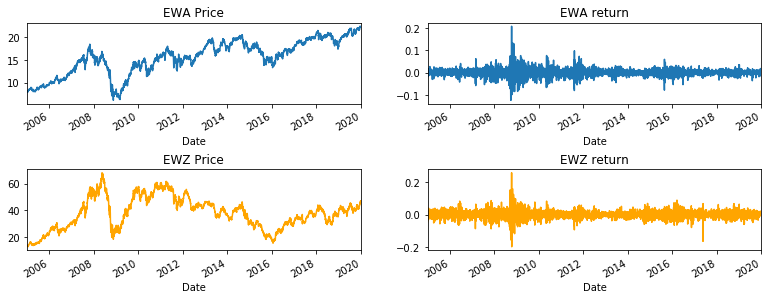

In [57]:
#開始畫圖
plt.subplots_adjust(top=1.5, bottom=0, left=0.3, right=2, hspace=0.8, wspace=0.2)
plt.subplot(3,2,1)   #2：共兩列，2：共兩行，1：目前在第一格子圖
plt.title("EWA Price")
data[tickers[0]].plot()
plt.subplot(3,2,2)
plt.title("EWA return")
returns[tickers[0]].plot()
# color="m"
plt.subplot(3,2,3)   #2：共兩列，2：共兩行，1：目前在第一格子圖
plt.title("EWZ Price")
data[tickers[1]].plot(color="orange")
plt.subplot(3,2,4)
plt.title("EWZ return")
returns[tickers[1]].plot(color="orange")

<b> 2. Portfolio Return比較

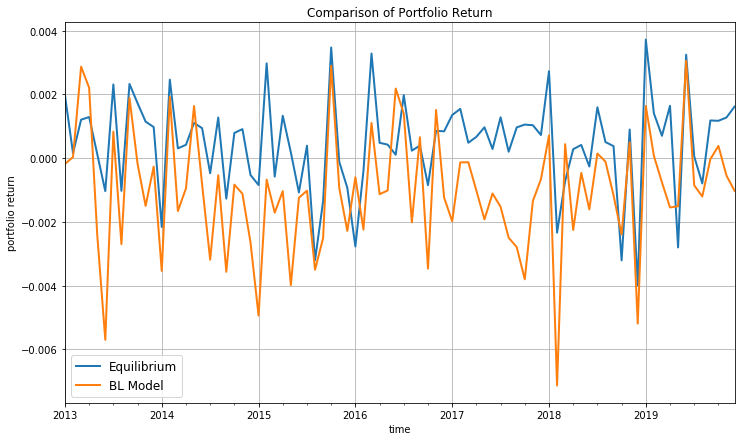

Equilibrium total return: 0.005560607192121073
BL Model total return: -0.012288762901372687


In [58]:
plt.figure(figsize=(12,7))

comparison_ret["Equilibrium"].plot(linewidth=2)
comparison_ret["BL Model"].plot(linewidth=2)

plt.grid(True)
plt.legend(loc='lower left', fontsize=12)
plt.xlabel('time')
plt.ylabel('portfolio return')
plt.title('Comparison of Portfolio Return')
plt.show()

print("Equilibrium total return:",eq_ret)
print("BL Model total return:", bl_ret)

<b> 3. Portfolio Volatility 比較

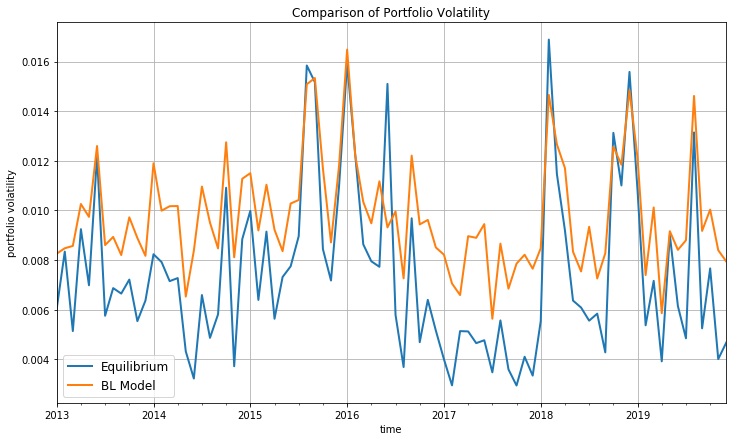

Equilibrium volatility: 0.005222498383445923
BL Model volatility: 0.006657496024643331


In [59]:
plt.figure(figsize=(12,7))

comparison_vol["Equilibrium"].plot(linewidth=2)
comparison_vol["BL Model"].plot(linewidth=2)

plt.grid(True)
plt.legend(loc='lower left', fontsize=12)
plt.xlabel('time')
plt.ylabel('portfolio volatility')
plt.title('Comparison of Portfolio Volatility')
plt.show()

print("Equilibrium volatility:", eq_vol)
print("BL Model volatility:", bl_vol)

<b> 4. Portfolio Sharpe Ratio比較

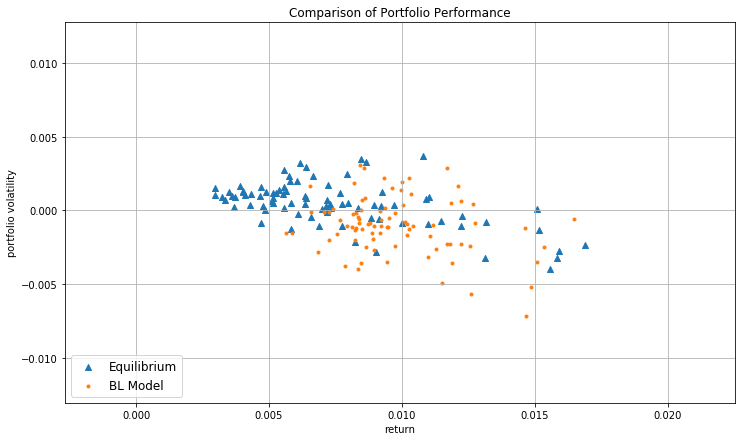

Equilibrium Sharpe: 1.0647408163393357
BL Model Sharpe: -1.8458535845736452


In [60]:
plt.figure(figsize=(12,7))

plt.scatter(comparison_vol["Equilibrium"], comparison_ret["Equilibrium"], label="Equilibrium",marker='^')
plt.scatter(comparison_vol["BL Model"], comparison_ret["BL Model"], label="BL Model",marker='.')

plt.grid(True)
plt.legend(loc='lower left', fontsize=12)
plt.xlabel('return')
plt.ylabel('portfolio volatility')
plt.title('Comparison of Portfolio Performance')
plt.show()

print("Equilibrium Sharpe:", eq_ret/eq_vol)
print("BL Model Sharpe:", bl_ret/bl_vol)